In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# carregar os dados
file_path = '/content/dataset_carbon_filter.csv'
data = pd.read_csv(file_path)

# Remover a coluna de índice
data.drop(columns=['Unnamed: 0'], inplace=True)

# separar features e labels
X = data[['campaign_E', 'resistance_E']]
y = data['target_cycle']

# codificar as labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.15, random_state=42)

# normalizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# treinar o modelo svm com os melhores parametros
svm_model = SVC(kernel='rbf', C=0.1, gamma=0.01, class_weight={0: 1, 1: 2, 2: 2}, random_state=42)
svm_model.fit(X_train, y_train)

# prever no conjunto de teste
y_pred = svm_model.predict(X_test)

# avaliar o modelo
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

#Parâmetros do Modelo:

- C=0.1 e gamma=0.01 são valores que controlam a margem e a influência dos pontos de dados, respectivamente. Valores menores de C podem levar a uma margem mais larga, o que ajuda a evitar overfitting.
- O kernel RBF é adequado para capturar relações não lineares nos dados.
- A escolha de class_weight={0: 1, 1: 2, 2: 2} ajuda a balancear a influência das classes, o que é especialmente importante quando há um desequilíbrio de classes.

In [7]:
# Verificar valores nulos
print(data.isnull().sum())

campaign_E      0
resistance_E    0
cycle_E         0
target_cycle    0
dtype: int64


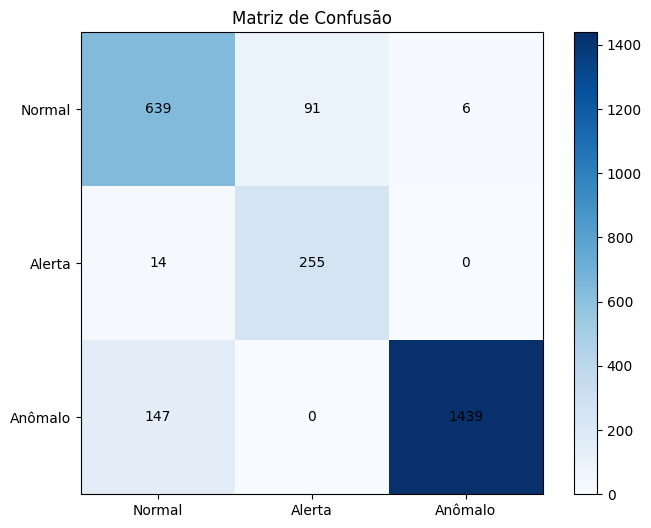

In [15]:
# função para adicionar os números dentro dos quadrados da matriz de confusão
def confusion_matrix(ax, conf_matrix):
    for (i, j), value in np.ndenumerate(conf_matrix):
        ax.text(j, i, str(value), ha='center', va='center', color='black')

# Matriz de confusão
conf_matrix = cm

# plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

# adicionar os números dentro dos quadrados usando a função
confusion_matrix(plt.gca(), conf_matrix)

plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1, 2], ['Normal', 'Alerta', 'Anômalo'])
plt.yticks([0, 1, 2], ['Normal', 'Alerta', 'Anômalo'])
plt.show()

#Classe Normal:

- Acertos: 639
- Erros (Alerta): 91
- Erros (Anômalos): 6

#Classe Alerta:

- Acertos: 255
- Erros (Normal): 14
- Erros (Anômalos): 0

#Classe Anômalo:

- Acertos: 1439
- Erros (Normal): 147
- Erros (Alerta): 0

#Explicação

A matriz de confusão mostra um bom desempenho geral, mas ainda há um número significativo de falsos negativos na classe Normal e falsos negativos na classe Anômalo.

In [16]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9004245465071401
F1 Score: 0.9036624640057125


As métricas de 'Accuracy' e 'F1 Score' indicam um desempenho forte e consistente do modelo.

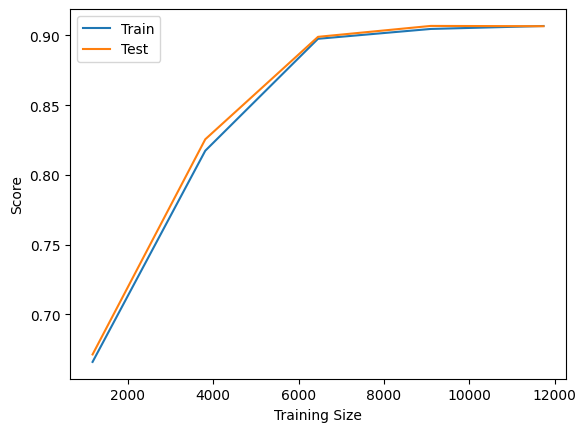

In [10]:
# plotar a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

#Curva de Treinamento (Train):

- Começa baixa e sobe rapidamente à medida que o tamanho do conjunto de treinamento aumenta.
- A curva se estabiliza em torno de 6.000 amostras e continua quase constante até o final.

#Curva de Teste (Test):

- Segue um padrão semelhante ao da curva de treinamento.
- Mostra um aumento inicial rápido e depois estabiliza, aproximando-se da curva de treinamento.

A proximidade das curvas de treinamento e teste indica que o modelo está generalizando bem e não há sinais claros de overfitting.

In [14]:
# validação cruzada dos dados de teste
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation CV Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.90156676 0.90735695 0.90698467 0.90017036 0.91720613]
Mean CV Accuracy: 0.9066569728309558
Standard Deviation CV Accuracy: 0.005997809510962796


- A média dos scores de validação cruzada é menor do que a acurácia obtida no conjunto de teste. Isso pode indicar que o modelo está um pouco otimista no conjunto de teste.
- O desvio padrão é relativamente pequeno, o que sugere que o modelo tem um desempenho consistente em diferentes subconjuntos dos dados de treinamento.